# Knn (Classification) using Builtin Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [6]:
print("Class labels mapping:")
for i, class_name in enumerate(iris.target_names):
    print(f"{i}: {class_name}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Training Set:")
y_train_pred = knn.predict(X_train)
for actual, predicted in zip(y_train, y_train_pred):
    print(f"Actual: {actual} ({iris.target_names[actual]}), Predicted: {predicted} ({iris.target_names[predicted]})")

print("\nTesting Set:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual} ({iris.target_names[actual]}), Predicted: {predicted} ({iris.target_names[predicted]})")


Class labels mapping:
0: setosa
1: versicolor
2: virginica
Training Set:
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 2 (virginica), Predicted: 2 (virginica)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 2 (virginica), Predicted: 2 (virginica)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 2 (virginica), Predicted: 2 (virginica)
Actual: 2 (virginica), Predicted: 2 (virginica)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 2 (virginica), Predicted: 2 (virginica)
Actual: 1

In [9]:
accuracy = knn.score(X_test, y_test)
print(f'\nKNN classification accuracy: {accuracy * 100:.2f}%')

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')


KNN classification accuracy: 100.00%

Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R2 Score: 1.0000


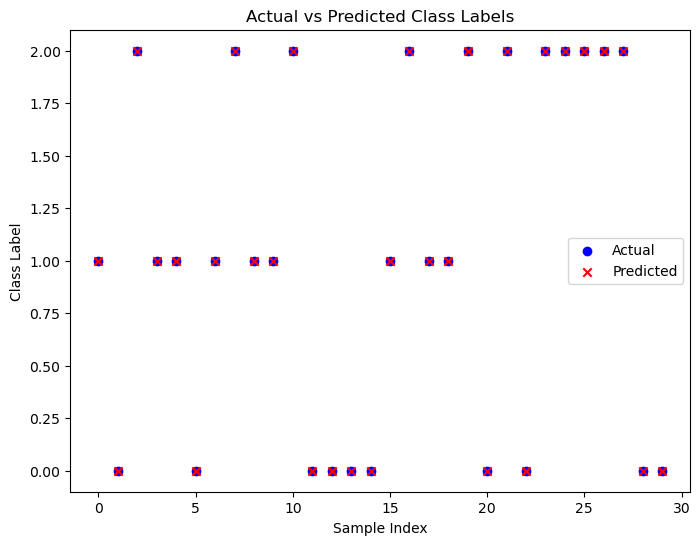

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Actual vs Predicted Class Labels')
plt.legend()
plt.show()

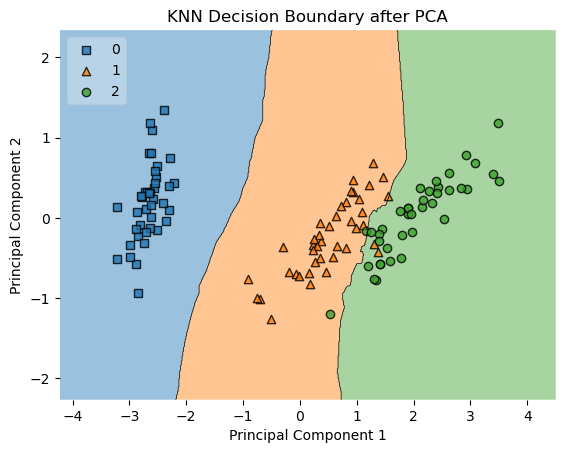

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, clf=knn, legend=2)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KNN Decision Boundary after PCA")
plt.show()